In [1]:
#import statements for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
#Creating a dataframe to read the original csv dataset
MarketingCampaignDF = pd.read_csv("marketing_campaign.csv", sep = '\t')

In [3]:
#view the dataframe
MarketingCampaignDF

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
#columns in the dataframe
MarketingCampaignDF.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
#Total number of rows in the dataset
num_rows = MarketingCampaignDF.shape[0]
num_rows

2240

In [6]:
#Find missing values in each column
num_rows = MarketingCampaignDF.shape[0]
num_missing = num_rows - MarketingCampaignDF.count()
print(num_missing)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


We found 24 missing income values for 2240 customers. We have decided to fill them with the mean of income since this accounts to just 1.07% of the data

In [7]:
#Fill the missing values with the mean of income
MarketingCampaignDF['Income']=MarketingCampaignDF['Income'].fillna(MarketingCampaignDF['Income'].mean())

In [8]:
#view dataframe after filling missing values
MarketingCampaignDF

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [9]:
#dropping columns that we don't use.
MarketingCampaignDF.drop(['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                          'AcceptedCmp5','Z_CostContact','Z_Revenue'], axis = 1,inplace = True)

In [10]:
#Check if columns are deleted and no missing values are present
num_rows = MarketingCampaignDF.shape[0]
num_missing = num_rows - MarketingCampaignDF.count()
print(num_missing)

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64


In [11]:
# Customer Age
MarketingCampaignDF["Age"] = (pd.Timestamp('now').year) - MarketingCampaignDF["Year_Birth"]


In [12]:
#Drop year of birth since age is included
MarketingCampaignDF.drop(['Year_Birth'],axis = 1, inplace = True)

In [13]:
#Check if year_birth is deted and age is added and no missing values are present
num_rows = MarketingCampaignDF.shape[0]
num_missing = num_rows - MarketingCampaignDF.count()
print(num_missing)

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
Age                    0
dtype: int64


In [14]:
#REPLACING THE CONFLICT VALUES IN Marital_status..
MarketingCampaignDF['Marital_Status'] = MarketingCampaignDF['Marital_Status'].replace(['Married', 'Together'],'Relationship')
MarketingCampaignDF['Marital_Status'] = MarketingCampaignDF['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 
                                                                                       'YOLO', 'Absurd'],'Single')

In [15]:
#COMBINING DIFFERENT DATAFRAME INTO A SINGLE COLUMN TO REDUCE THE DIMENSIONS OF THE DATASET....
MarketingCampaignDF['Total_Kids'] = MarketingCampaignDF['Kidhome'] + MarketingCampaignDF['Teenhome']
MarketingCampaignDF['Total_Amount_Spent'] = MarketingCampaignDF['MntWines'] + MarketingCampaignDF['MntFruits'] + MarketingCampaignDF['MntMeatProducts'] + MarketingCampaignDF['MntFishProducts'] + MarketingCampaignDF['MntSweetProducts'] + MarketingCampaignDF['MntGoldProds']
MarketingCampaignDF['Total_Purchases'] = MarketingCampaignDF['NumWebPurchases'] + MarketingCampaignDF['NumCatalogPurchases'] + MarketingCampaignDF['NumStorePurchases'] + MarketingCampaignDF['NumDealsPurchases']

In [16]:
#Clean dataframe
MarketingCampaignDF

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_Kids,Total_Amount_Spent,Total_Purchases
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,8,10,4,7,0,1,64,0,1617,25
1,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,1,1,2,5,0,0,67,2,27,6
2,Graduation,Relationship,71613.0,0,0,21-08-2013,26,426,49,127,...,8,2,10,4,0,0,56,0,776,21
3,Graduation,Relationship,26646.0,1,0,10-02-2014,26,11,4,20,...,2,0,4,6,0,0,37,1,53,8
4,PhD,Relationship,58293.0,1,0,19-01-2014,94,173,43,118,...,5,3,6,5,0,0,40,1,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Relationship,61223.0,0,1,13-06-2013,46,709,43,182,...,9,3,4,5,0,0,54,1,1341,18
2236,PhD,Relationship,64014.0,2,1,10-06-2014,56,406,0,30,...,8,2,5,7,0,0,75,3,444,22
2237,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,217,...,2,3,13,6,0,0,40,0,1241,19
2238,Master,Relationship,69245.0,0,1,24-01-2014,8,428,30,214,...,6,5,10,3,0,0,65,1,843,23


Outlier detection:

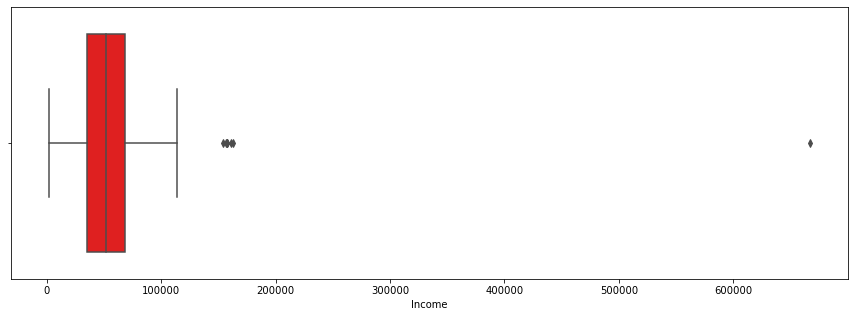

In [17]:
#Income Analysis - To detect outliers
plt.figure(figsize=(15,5))
sns.boxplot(x=MarketingCampaignDF['Income'], color='red')

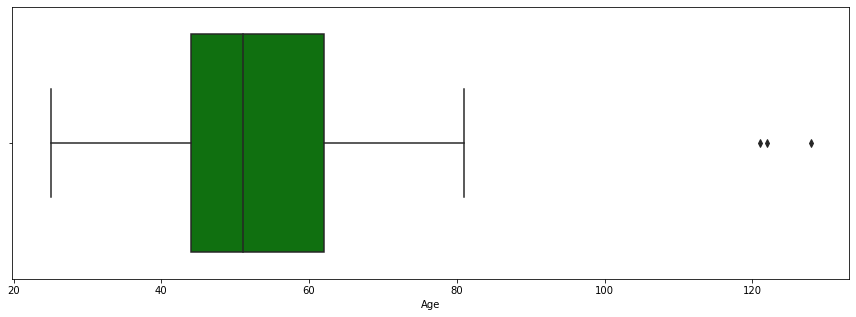

In [18]:
#Age Analysis - To detect outliers
plt.figure(figsize=(15,5))
sns.boxplot(x=MarketingCampaignDF['Age'], color='Green')

In [19]:
#Detect the outliers using IQR technique for Income

q1 = MarketingCampaignDF['Income'].quantile(0.25)
q3 = MarketingCampaignDF['Income'].quantile(0.75)
iqr = q3 - q1
  
#Upper and Lower Limits
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

print("Lower bound:", lower)
print("Upper bound:", upper)
 

Lower bound: -13587.75
Upper bound: 117416.25


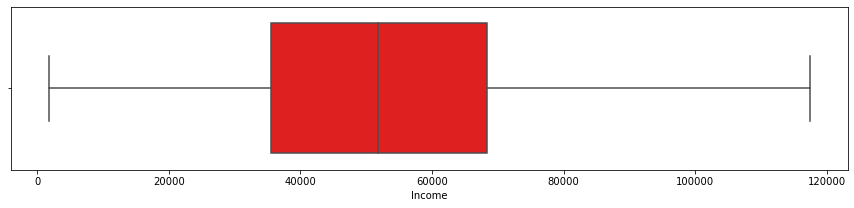

In [20]:
#removing outliers in income and view the changed data in box plot
MarketingCampaignDF['Income'] = np.where(MarketingCampaignDF['Income'] > upper, upper, 
                 np.where(MarketingCampaignDF['Income'] < lower, lower,
                  MarketingCampaignDF['Income']))

#distribution of Income without the greater outliers
plt.figure(figsize=(15,3))
sns.boxplot(x=MarketingCampaignDF['Income'], color='red')

In [21]:
#Detect the outliers using IQR technique for Age

q1 = MarketingCampaignDF['Age'].quantile(0.25)
q3 = MarketingCampaignDF['Age'].quantile(0.75)
iqr = q3 - q1
  
#Upper and Lower Limits
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

print("Lower bound:", lower)
print("Upper bound:", upper)
 

Lower bound: 17.0
Upper bound: 89.0


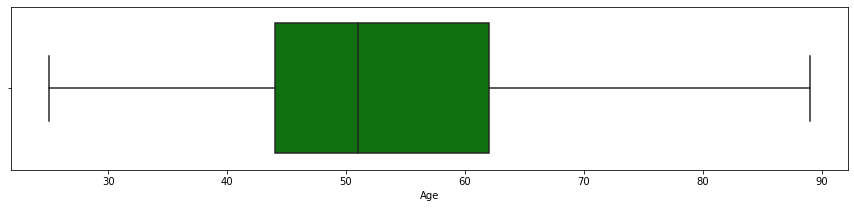

In [22]:
#removing outliers in age and view the changed data in box plot

MarketingCampaignDF['Age'] = np.where(MarketingCampaignDF['Age'] > upper, upper, 
                 np.where(MarketingCampaignDF['Age'] < lower, lower,
                  MarketingCampaignDF['Age']))

#distribution of Age without the greater outliers
plt.figure(figsize=(15,3))
sns.boxplot(x=MarketingCampaignDF['Age'], color='green')

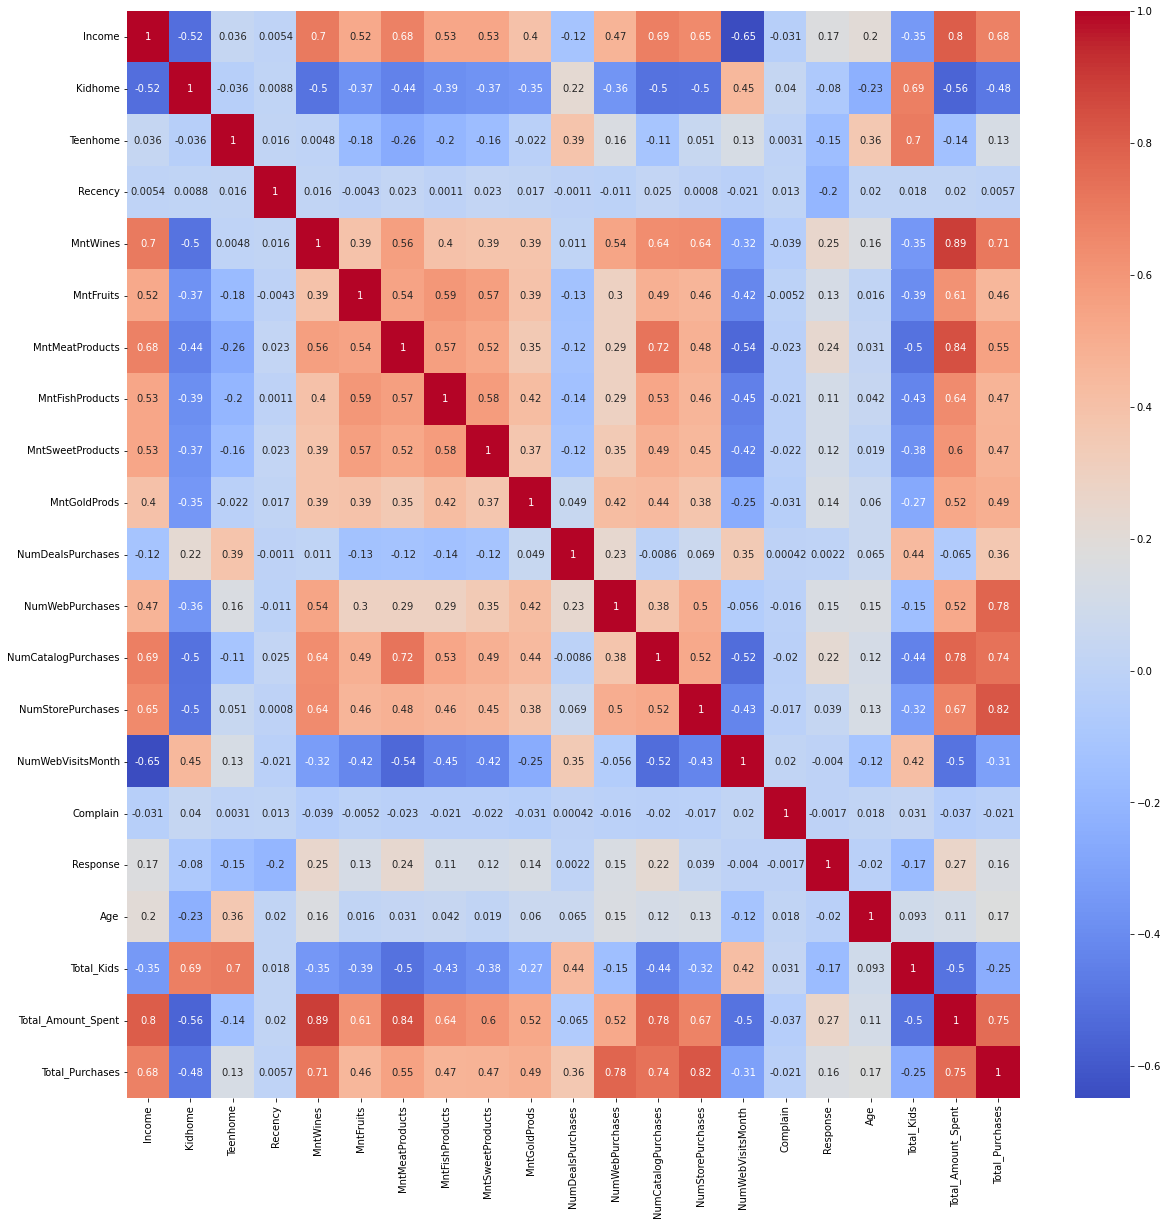

In [23]:
# Let's look at the correlation between the variables
corr = MarketingCampaignDF.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm');

When we look at the correlation table, we can say that there is a relationship between total_spend and wines - meat and income columns. Assuming a strong relationship above 0.70, the strongest relationship between these columns is between total_spend and wines.

When we look at the table, our data set looks clean and there is no multicollinearity problem.

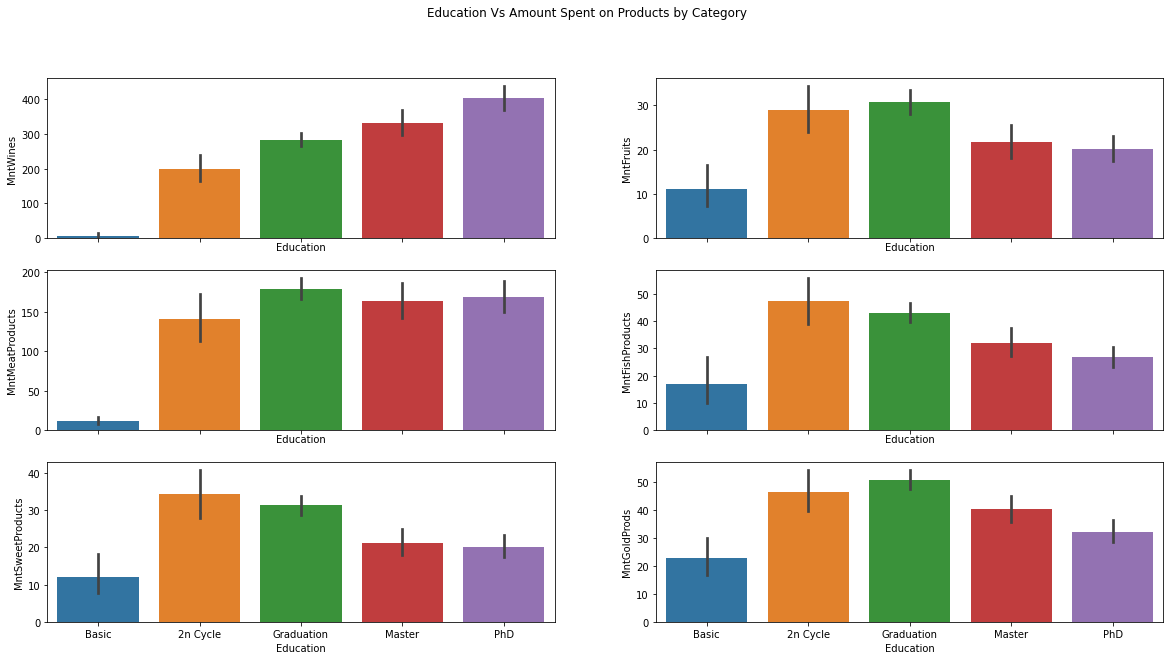

In [25]:
#Question 1
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(20,10))
fig.suptitle('Education Vs Amount Spent on Products by Category')

order= ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

sns.barplot(y='MntWines', x='Education', data=MarketingCampaignDF, ax=axes[0,0], order=order)

sns.barplot(y='MntFruits', x='Education', data=MarketingCampaignDF, ax=axes[0,1], order=order)

sns.barplot(y='MntMeatProducts', x='Education', data=MarketingCampaignDF, ax=axes[1,0], order=order)

sns.barplot(y='MntFishProducts', x='Education', data=MarketingCampaignDF, ax=axes[1,1], order=order)

sns.barplot(y='MntSweetProducts', x='Education', data=MarketingCampaignDF, ax=axes[2,0], order=order)

sns.barplot(y='MntGoldProds', x='Education', data=MarketingCampaignDF, ax=axes[2,1], order=order)


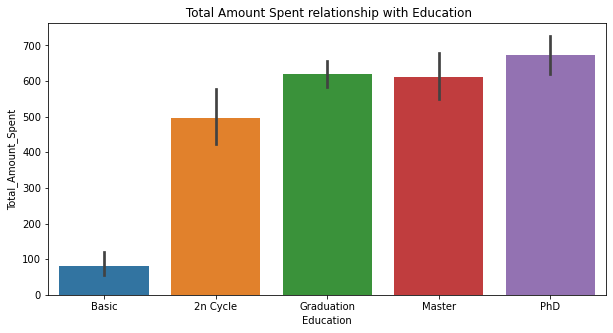

In [26]:
plt.figure(figsize=(10,5))
plt.title(' Total Amount Spent relationship with Education')
sns.barplot(x='Education', y='Total_Amount_Spent', data=MarketingCampaignDF, order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])

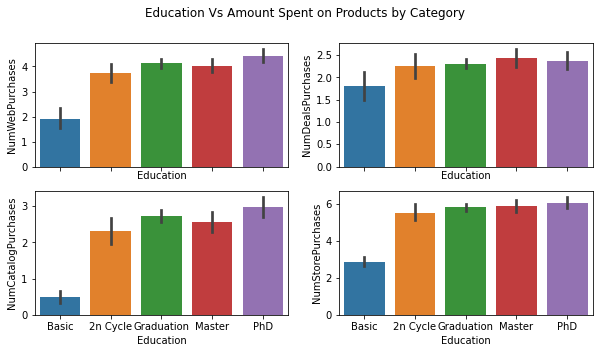

In [27]:
#Question 1
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,5))
fig.suptitle('Education Vs Amount Spent on Products by Category')

order= ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

sns.barplot(y='NumWebPurchases', x='Education', data=MarketingCampaignDF, ax=axes[0,0], order=order)

sns.barplot(y='NumDealsPurchases', x='Education', data=MarketingCampaignDF, ax=axes[0,1], order=order)

sns.barplot(y='NumCatalogPurchases', x='Education', data=MarketingCampaignDF, ax=axes[1,0], order=order)

sns.barplot(y='NumStorePurchases', x='Education', data=MarketingCampaignDF, ax=axes[1,1], order=order)


People with Basic Education tend to spend less in every category, probably because of the reduced income. More the Education, more wines and meat.

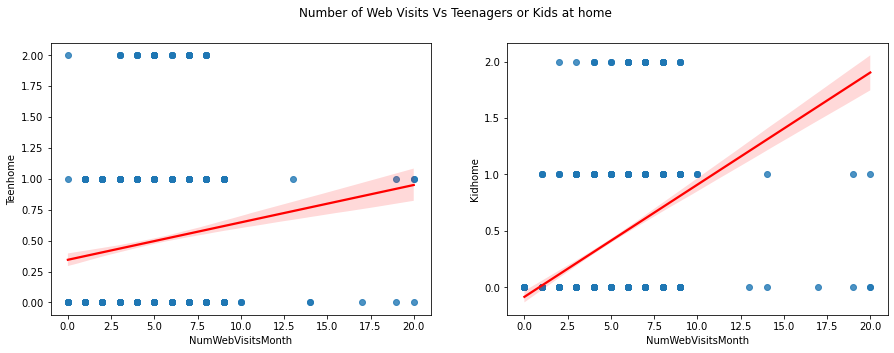

In [28]:
#Kid's Age versus webPurchases - Question 3
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Number of Web Visits Vs Teenagers or Kids at home')

sns.regplot(x='NumWebVisitsMonth', y='Teenhome', data=MarketingCampaignDF, ax=axes[0], line_kws={"color": "red"})

sns.regplot(x='NumWebVisitsMonth', y='Kidhome', data=MarketingCampaignDF, ax=axes[1], line_kws={"color": "red"})

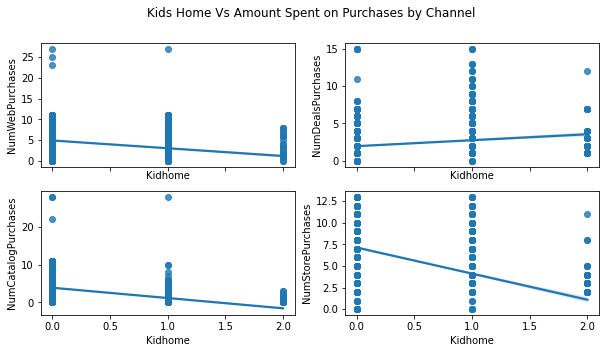

In [29]:
#Kidshome versus webPurchases - Question 2
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,5))
fig.suptitle('Kids Home Vs Amount Spent on Purchases by Channel')

sns.regplot(y='NumWebPurchases', x='Kidhome', data=MarketingCampaignDF, ax=axes[0,0])

sns.regplot(y='NumDealsPurchases', x='Kidhome', data=MarketingCampaignDF, ax=axes[0,1])

sns.regplot(y='NumCatalogPurchases', x='Kidhome', data=MarketingCampaignDF, ax=axes[1,0])

sns.regplot(y='NumStorePurchases', x='Kidhome', data=MarketingCampaignDF, ax=axes[1,1])

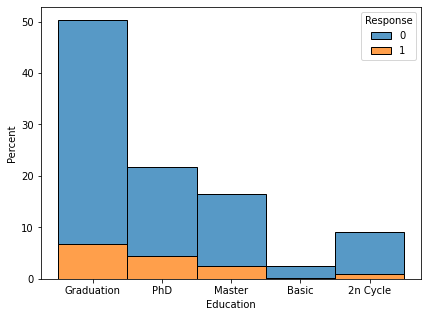

In [30]:
# Education & Response - Question 4
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=MarketingCampaignDF, x="Education", hue="Response", multiple="stack", stat="percent")



([<matplotlib.axis.XTick at 0x23bdccd4d00>,
 <a list of 3 Text major ticklabel objects>)

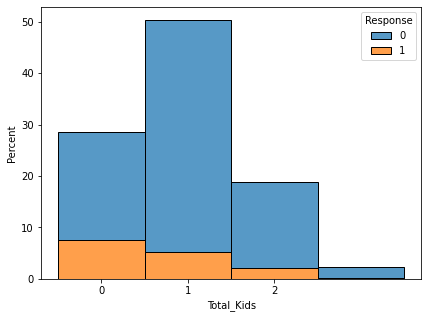

In [31]:
# Kid Home & Response - Question 4
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=MarketingCampaignDF, x="Total_Kids", hue="Response", multiple="stack", stat="percent", discrete=True)
plt.xticks([0, 1, 2])

([<matplotlib.axis.XTick at 0x23bdcec4df0>,
 <a list of 3 Text major ticklabel objects>)

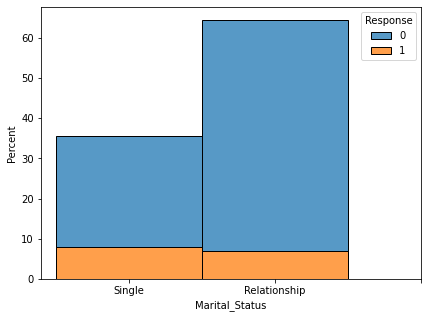

In [32]:
# Kid Home & Response - Question 4
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=MarketingCampaignDF, x="Marital_Status", hue="Response", multiple="stack", stat="percent", discrete=True)
plt.xticks([0, 1, 2])

People with lesser kids repond to marketing campaigns.

In [33]:
model = smf.ols(formula = 'Total_Amount_Spent ~ Income',
               data = MarketingCampaignDF)

results = model.fit()

In [34]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Amount_Spent   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     4091.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:58:14   Log-Likelihood:                -16351.
No. Observations:                2240   AIC:                         3.271e+04
Df Residuals:                    2238   BIC:                         3.272e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -593.9632     20.226    -29.366      0.0

Total Spent = -229.5615 + 0.0160 * Income


In [37]:
model = smf.ols(formula = 'Total_Amount_Spent ~ Kidhome + NumDealsPurchases ',
               data = MarketingCampaignDF)

results = model.fit()

In [38]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Amount_Spent   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     510.7
Date:                Sat, 18 Dec 2021   Prob (F-statistic):          2.04e-183
Time:                        12:58:29   Log-Likelihood:                -17094.
No. Observations:                2240   AIC:                         3.419e+04
Df Residuals:                    2237   BIC:                         3.421e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           844.6808     17.57

We can find that the compaign acceptance rate in high education groups(Master and PhD) are higher than that in low education groups.

In [39]:
MarketingCampaignDF.to_csv('NewMarketingCamp.csv') 

In [40]:
model_no_nan = smf.logit('Response ~ Total_Kids + Marital_Status',
                  data = MarketingCampaignDF )

results_no_nan = model_no_nan.fit()

Optimization terminated successfully.
         Current function value: 0.395926
         Iterations 6


In [41]:
print(results_no_nan.summary())

                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2237
Method:                           MLE   Df Model:                            2
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                 0.05991
Time:                        12:58:52   Log-Likelihood:                -886.87
converged:                       True   LL-Null:                       -943.39
Covariance Type:            nonrobust   LLR p-value:                 2.849e-25
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.5243      0.106    -14.370      0.000      -1.732      -1.316
Marital_Status[T.Single]     0.8151      0.122      6.686      0.000       0.576       1.

People with younger kids visit the website more but are not able to make web purchases. They however purchase when there are deals. A good insight would be to target website sales and provide deals for parents with kids

In [ ]:
# Select first N columns
first_n_columns  = MarketingCampaignDF.iloc[: , 7:15]
print("First 5 Columns Of Dataframe : ")
print(first_n_columns)

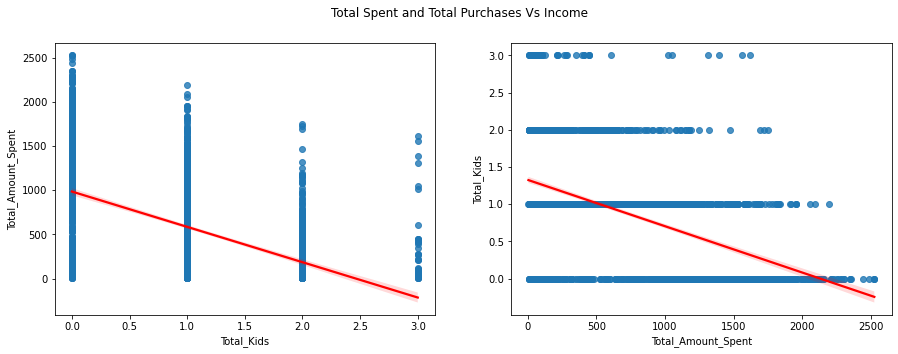

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Total Spent and Total Purchases Vs Income')

sns.regplot(x='Total_Kids', y='Total_Amount_Spent', data=MarketingCampaignDF, ax=axes[0], line_kws={"color": "red"})

sns.regplot(x='Total_Amount_Spent', y='Total_Kids', data=MarketingCampaignDF, ax=axes[1], line_kws={"color": "red"})

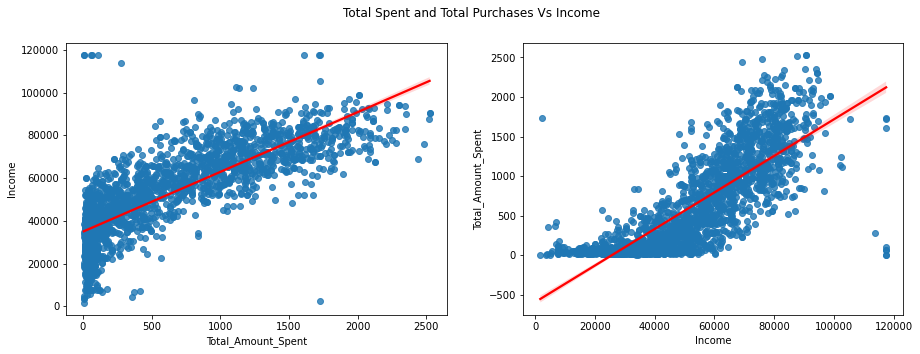

In [44]:
#Question 4
fig, axes = plt.subplots(1, 2, figsize=(15,5)) 
fig.suptitle('Total Spent and Total Purchases Vs Income')

sns.regplot(x='Total_Amount_Spent', y='Income', data=MarketingCampaignDF, ax=axes[0], line_kws={"color": "red"})

sns.regplot(x='Income', y='Total_Amount_Spent', data=MarketingCampaignDF, ax=axes[1], line_kws={"color": "red"})